### Last week
- KNN as classifier and regressor
- Tuning of KNN

# *SVM and hyperparameter tuning*

## SVR
 - Main aim of SVM is to find a hyperplane in an N-dimensional space (N is number of features) that distinctly classifies the data points.

<figure>
    <img
    src="misc/SVM-1.webp"
    width="500" height="500">
    <img
    src="misc/SVM-2.webp"
    width="500" height="500">
    <center><figcaption>Possible hyperplanes</figcaption></center>
</figure>

- Range of output is from 1 to -1. 

## Cost Function

- Maximise the margin between the data points and the hyperplane. The loss function that helps maximise the margin is *hinge loss*.


## Project Aim:
### Predict *Apple Stock* price (Adjusted Close Price) for past 1 year data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('datasets/AAPL_stock.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.750000,45377800
247,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
248,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
249,2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200
250,2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48254600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
# change date to pandas date
df['Date'] = pd.to_datetime(df['Date'])

               Date      Open      High       Low     Close  Adj Close   
Date       1.000000  0.596996  0.593065  0.606214  0.601574   0.611554  \
Open       0.596996  1.000000  0.996249  0.996806  0.991336   0.991308   
High       0.593065  0.996249  1.000000  0.996684  0.996571   0.996379   
Low        0.606214  0.996806  0.996684  1.000000  0.996730   0.996765   
Close      0.601574  0.991336  0.996571  0.996730  1.000000   0.999914   
Adj Close  0.611554  0.991308  0.996379  0.996765  0.999914   1.000000   
Volume    -0.474015 -0.434227 -0.405248 -0.455147 -0.427818  -0.431404   

             Volume  
Date      -0.474015  
Open      -0.434227  
High      -0.405248  
Low       -0.455147  
Close     -0.427818  
Adj Close -0.431404  
Volume     1.000000  


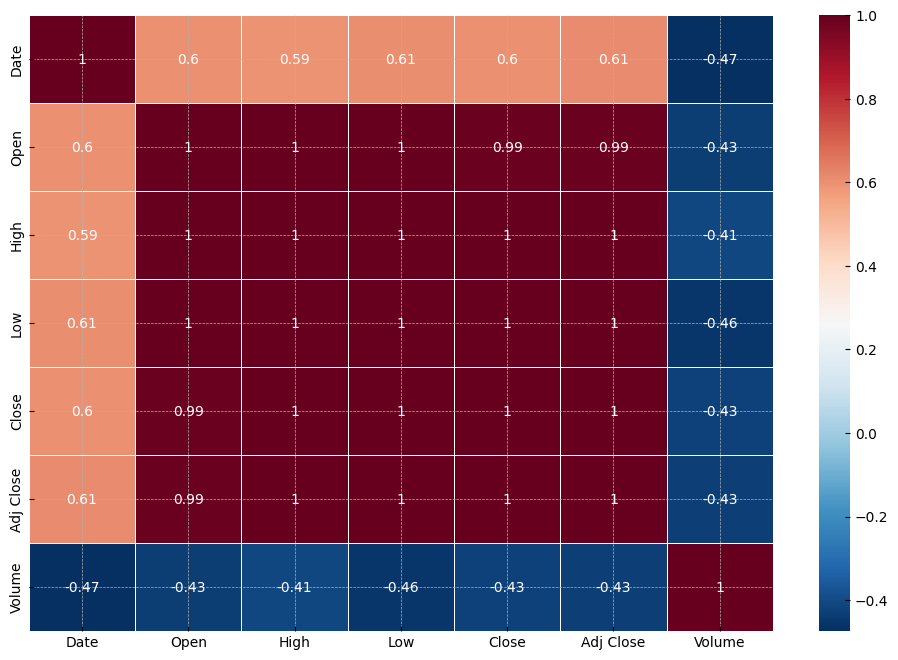

In [5]:
# Pearson Correlation Coefficient
corr = df.corr(method='pearson')
print(corr)

# Visulize correlation
plt.figure(figsize=(12,8))
corr_visual = sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu_r', annot=True, linewidth=0.5)
plt.show()

         Date        High        Open         Low   Adj Close
0  2022-07-29  163.630005  161.240005  159.500000  161.545364
1  2022-08-01  163.589996  161.009995  160.889999  160.551300
2  2022-08-02  162.410004  160.100006  159.630005  159.060211
3  2022-08-03  166.589996  160.839996  160.750000  165.143906
4  2022-08-04  167.190002  166.009995  164.429993  164.825790
5  2022-08-05  165.850006  163.210007  163.000000  164.596848
6  2022-08-08  167.809998  166.369995  164.199997  164.119019
7  2022-08-09  165.820007  164.020004  163.250000  164.168793
8  2022-08-10  169.339996  167.679993  166.899994  168.469131
9  2022-08-11  170.990005  170.059998  168.190002  167.722534
10 2022-08-12  172.169998  169.820007  169.399994  171.316086
11 2022-08-15  173.389999  171.520004  171.350006  172.401123
12 2022-08-16  173.710007  172.779999  171.660004  172.241867
13 2022-08-17  176.149994  172.770004  172.570007  173.754929
14 2022-08-18  174.899994  173.750000  173.119995  173.356735
15 2022-

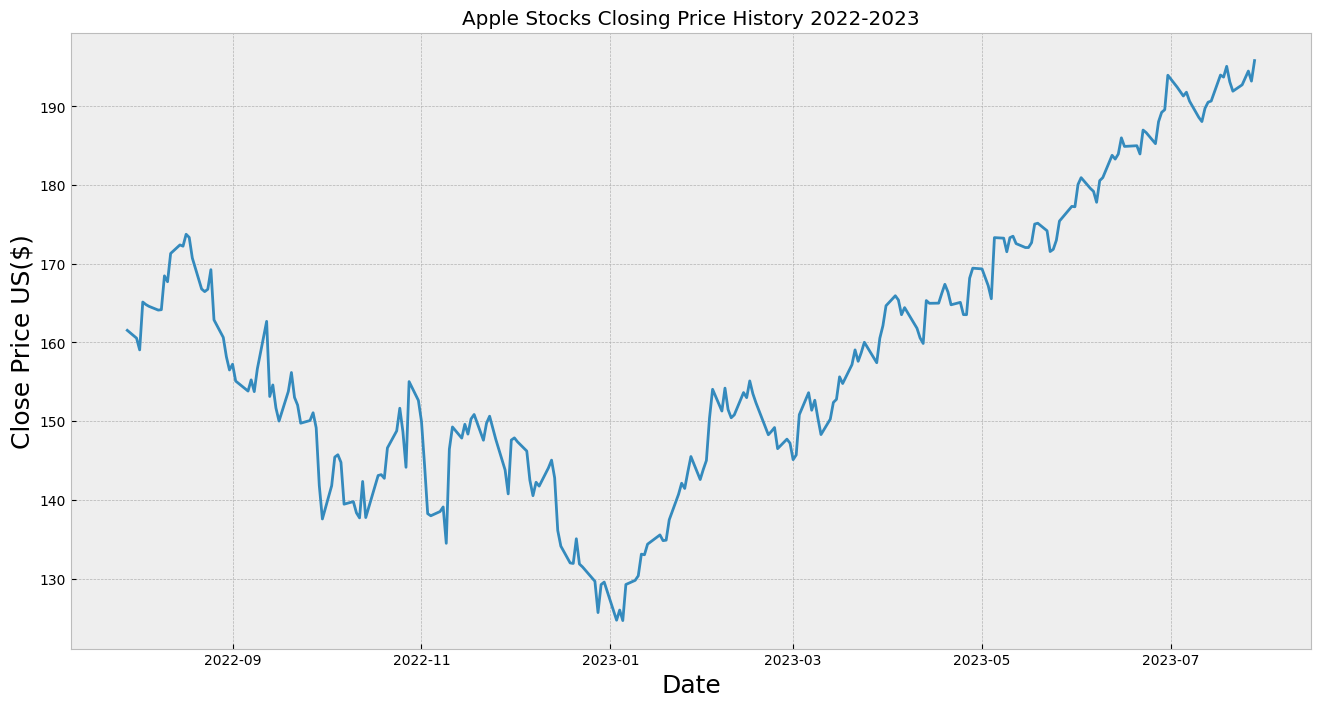

In [6]:
# Visualize the Dependent variable with Independent Features
#prepare dataset to work with 
appl_df = df[['Date','High','Open','Low','Adj Close']]
print(appl_df.head(20))
plt.figure(figsize=(16,8))
plt.title('Apple Stocks Closing Price History 2022-2023')
plt.plot(appl_df['Date'],appl_df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
#plt.style.use('fivethirtyeight')
plt.show()

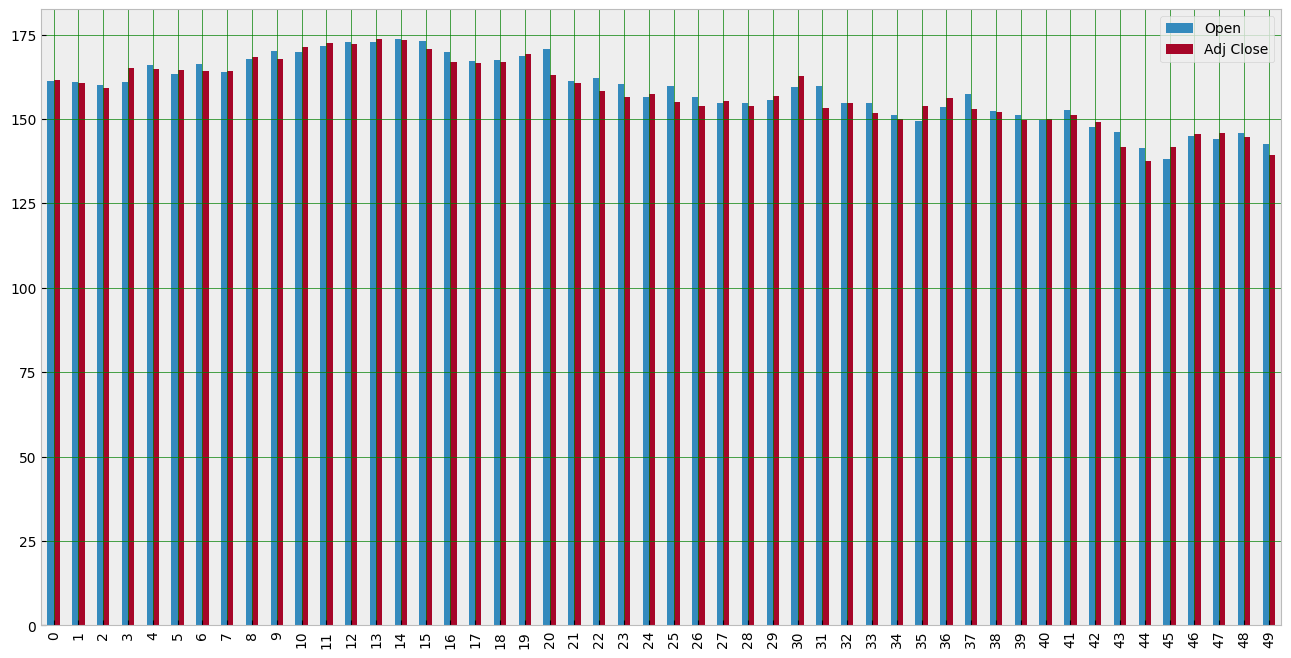

In [7]:
# Plot Open vs Close (Year 2022)
appl_df[['Open','Adj Close']].head(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

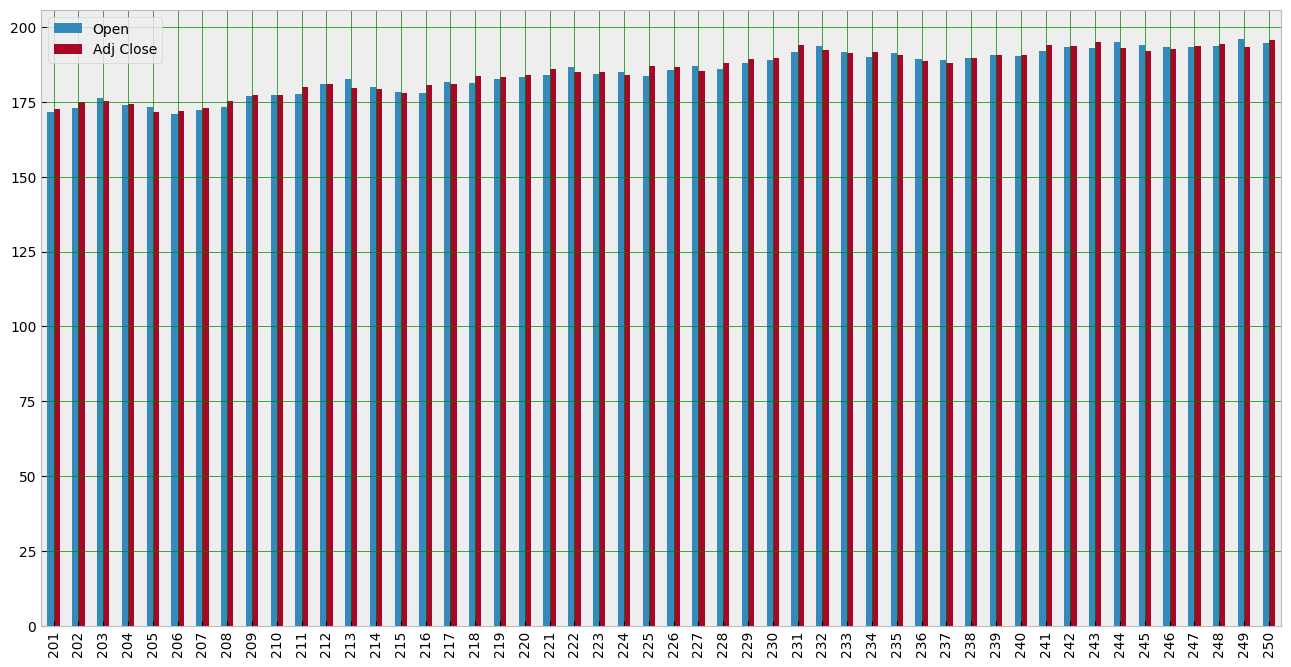

In [8]:
# Plot Open vs Close (Year 2023)
appl_df[['Open','Adj Close']].tail(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

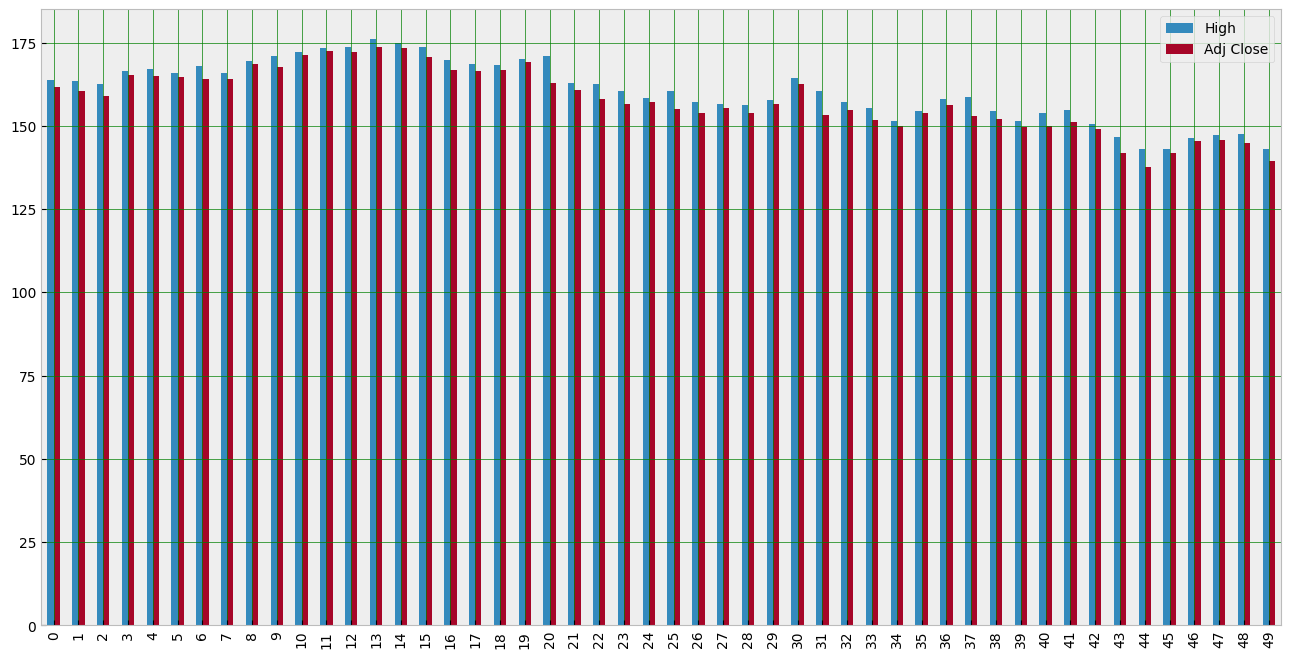

In [9]:
# Plot High vs Adj Close (Year 2022)
appl_df[['High','Adj Close']].head(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

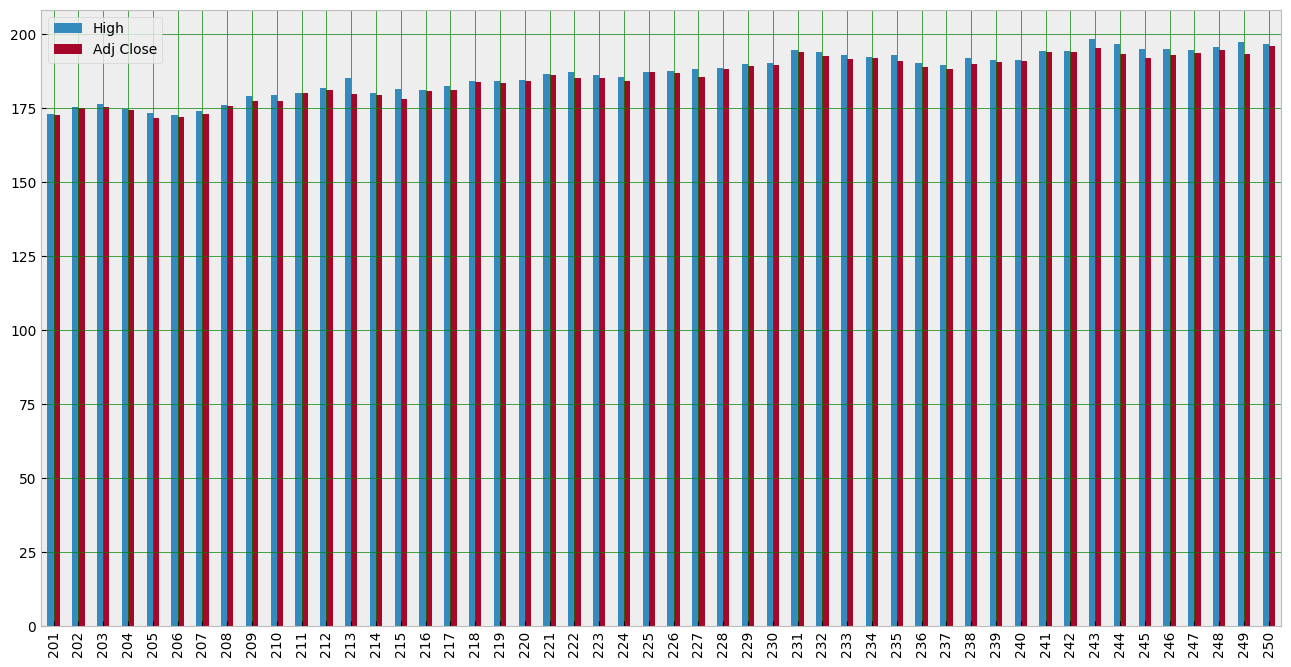

In [10]:
# Plot High vs Adj Close (Year 2023)
appl_df[['High','Adj Close']].tail(50).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [11]:
# creating year month and day from DateTime
appl_df['Year'] = df['Date'].dt.year
appl_df['Month'] = df['Date'].dt.month
appl_df['Day'] = df['Date'].dt.day

/var/folders/hs/0zv3m4r94rxc4xfktmvc3m300000gn/T/ipykernel_32390/3713043069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl_df['Year'] = df['Date'].dt.year


In [12]:
actual_price = appl_df.tail(1)
print(actual_price)
actual_price_to_pred = actual_price.drop(['Date', 'Adj Close'], axis=1)
actual_price_to_pred = actual_price_to_pred[['Day', 'Month', 'Year', 'High', 'Open', 'Low']]

appl_df = appl_df.head(len(appl_df)-1)

          Date        High        Open         Low   Adj Close  Year  Month   
250 2023-07-28  196.630005  194.669998  194.139999  195.830002  2023      7  \

     Day  
250   28  


In [13]:
appl_df.tail()

,Date,High,Open,Low,Adj Close,Year,Month,Day
245,2023-07-21,194.970001,194.100006,191.229996,191.940002,2023,7,21
246,2023-07-24,194.910004,193.410004,192.250000,192.750000,2023,7,24
247,2023-07-25,194.440002,193.330002,192.919998,193.619995,2023,7,25
248,2023-07-26,195.639999,193.669998,193.320007,194.500000,2023,7,26
249,2023-07-27,197.199997,196.020004,192.550003,193.220001,2023,7,27


In [14]:
# final dataset for model training
final_appl = appl_df[['Day', 'Month', 'Year', 'High', 'Open', 'Low', 'Adj Close']]

In [15]:
final_appl.tail()

,Day,Month,Year,High,Open,Low,Adj Close
245,21,7,2023,194.970001,194.100006,191.229996,191.940002
246,24,7,2023,194.910004,193.410004,192.250000,192.750000
247,25,7,2023,194.440002,193.330002,192.919998,193.619995
248,26,7,2023,195.639999,193.669998,193.320007,194.500000
249,27,7,2023,197.199997,196.020004,192.550003,193.220001


In [16]:
#separate Independent and dependent variable
x = final_appl.iloc[:,final_appl.columns != 'Adj Close']
y = final_appl.iloc[:, -1]
print(x.shape)  
print(y.shape)

(250, 6)
(250,)


In [17]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=42)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((187, 6), (187,), (63, 6), (63,))

In [19]:
# SVR linear model
svm_regressor = SVR(kernel='linear')
svm_model = svm_regressor.fit(x_train,y_train)
y_svm_pred = svm_model.predict(x_test)

In [20]:
# SVM Cross-Validation
svm_kfold = KFold(n_splits=20, random_state=42, shuffle=True)
results_kfold = cross_val_score(svm_model, x_test, y_test.astype('int'), cv=svm_kfold)
print("Accuracy on test data: ", results_kfold.mean()*100)

Accuracy on test data:  99.17504100742501


In [30]:
# checking on training data
results_kfold_train = cross_val_score(svm_model, x_train, y_train.astype('int'), cv=svm_kfold)
print("Accuracy on test data: ", results_kfold_train.mean()*100)

Accuracy on test data:  99.30410196223418


### As both training and testing accuracy is good the model isn't *overfitting*

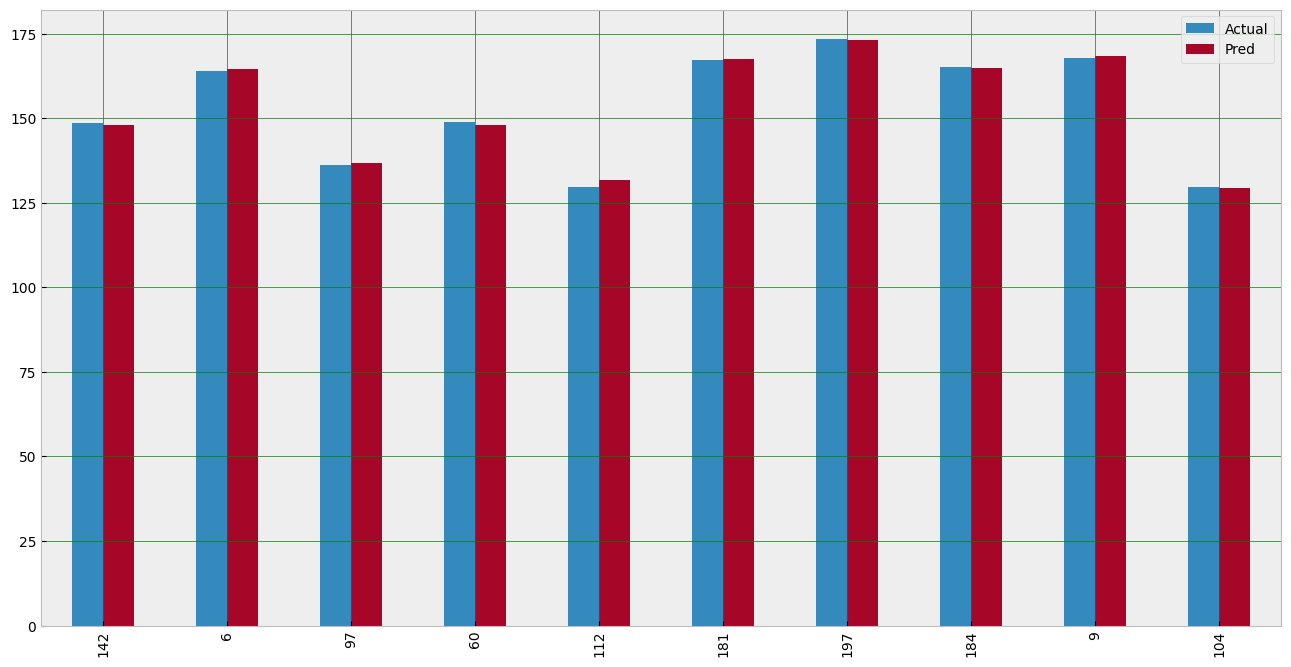

In [21]:
# Plot Actual vs Predicted
plot_svm_df = pd.DataFrame({'Actual':y_test,'Pred':y_svm_pred})
plot_svm_df.head(10).plot(kind='bar',figsize=(16,8))
plt.grid(which ='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which ='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
# metrics
svm_mse = np.sqrt(mean_squared_error(y_test,y_svm_pred))
print('SVM Model Root mean square error', svm_mse)

SVM Model Root mean square error 0.9408148801392879


In [23]:
# predicting the yesterday value
y_yesterday = svm_regressor.predict(actual_price_to_pred)

In [24]:
y_yesterday

array([196.4197782])

In [25]:
actual_price['Adj Close'].values

array([195.830002])

In [26]:
np.sqrt(mean_squared_error(y_yesterday,actual_price['Adj Close'].values))

0.5897761995753683

## *Tuning* the SVR model

In [27]:
param_grid = {
    'kernel': ('linear', 'rbf','poly'), 
    'C':[1.5, 10],
    'gamma': [1e-7, 1e-4], #1 * 10^(-7) or simply 0.0000001
    'epsilon':[0.1,0.2,0.5,0.3]}

svr_model = SVR()
svr_grid = GridSearchCV(svr_model, param_grid)
svr_grid.fit(x_train,y_train)
svr_grid.best_params_
svr_grid.best_estimator_

SVR(C=1.5, epsilon=0.5, gamma=1e-07, kernel='linear')

### Short explaination of the parameters used
- *kernel*: This parameter specifies the type of kernel to be used in the SVM algorithm. Kernels are used to transform the input data into a higher-dimensional space to make it easier to find a linear separation.

- *C*: The regularization parameter C controls the trade-off between maximizing the margin and minimizing the error on the training data. A smaller C value allows for a larger margin but may lead to more training errors (soft margin), while a larger C value penalizes training errors more (hard margin)

- *gamma*: Relevant for 'poly', 'rbf', and 'sigmoid' kernels. It is the kernel coefficient for 'rbf', 'poly', and 'sigmoid'. A low gamma value defines a larger similarity radius and can lead to smoother decision boundaries, while a high gamma value makes the decision boundary more sensitive to individual data points

- *epsilon*: This parameter defines the margin of tolerance for the epsilon-insensitive loss function. It specifies the maximum allowable distance between the predicted value and the true target for a data point to be considered correctly predicted. Smaller values of epsilon make the model more sensitive to errors.

In [28]:
# predicting using the above parameters
y_pred_grid = svr_grid.best_estimator_.predict(x_test)

In [29]:
# metrics
svm_mse = np.sqrt(mean_squared_error(y_test,y_pred_grid))
print('SVM Model Root mean square error', svm_mse)

SVM Model Root mean square error 0.919054715834094


## Use gridSearchCV best estimator to predict on the last row and get RMSE value. And compare with the base SVR

## Next week:
- Introduction to Decision Tree
- Code Walkthrough - Decision Tree
- Ensemble Learning -Bagging and Boosting - Random Forest
- Random Forest - Code Walkthrough